In [4]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

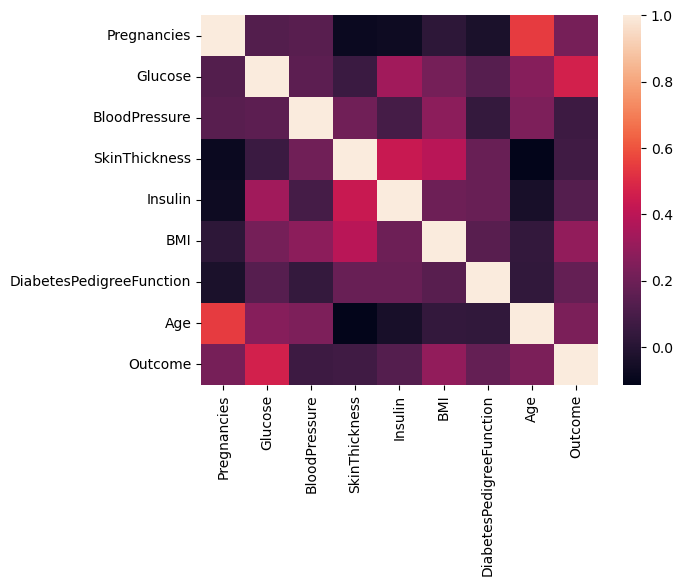

In [13]:
sns.heatmap(df.corr())

In [15]:
x = df.iloc[:, :-1]
y = df["Outcome"]

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
x_scaled = sc.fit_transform(x)

In [29]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [31]:
print(x_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 1)

In [74]:
# sequential model
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential

model = Sequential()

model.add(Dense(32, activation="relu", input_dim=8))
model.add(Dense(1, activation="sigmoid"))

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4570 - loss: 0.7272 - val_accuracy: 0.5974 - val_loss: 0.6740
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6897 - loss: 0.6615 - val_accuracy: 0.6883 - val_loss: 0.6247
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6760 - loss: 0.6155 - val_accuracy: 0.7273 - val_loss: 0.5886
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6965 - loss: 0.5925 - val_accuracy: 0.7468 - val_loss: 0.5613
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7234 - loss: 0.5600 - val_accuracy: 0.7597 - val_loss: 0.5411
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7181 - loss: 0.5326 - val_accuracy: 0.7662 - val_loss: 0.5246
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5152 - val_accuracy: 0.7727 - val_loss: 0.5123
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.5031 - val_accuracy: 0.7792 - 

In [78]:
# selecting best optimizer
import keras_tuner as kt

In [124]:
def build_model(hp):
    model = Sequential()
    
    num_layers = hp.Int("num_layers", min_value=5, max_value=20)
    
    for i in range(num_layers):
        units = hp.Int(f"units_{i}", min_value=8, max_value=128, step=8)
        activation = hp.Choice(f"activation_{i}", values=['relu', 'tanh', 'sigmoid'])
        dropout_rate = hp.Float(f"dropout_{i}", min_value=0.1, max_value=0.9, step=0.1)
        
        if i == 0:
            model.add(Dense(units, activation=activation, input_dim=8))
        else:
            model.add(Dense(units, activation=activation))
        
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = hp.Choice("optimizer", values=['rmsprop', 'sgd', 'adam', 'adadelta', 'nadam'])
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])
    
    return model

In [126]:
tuner = kt.RandomSearch(build_model , objective='val_accuracy',max_trials = 5,directory = 'mydir', project_name='finalmodelnew')

Reloading Tuner from mydir/finalmodelnew/tuner0.json


In [134]:
tuner.search(x_train, y_train, epochs=5, validation_data = (x_test, y_test))

In [130]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 104,
 'activation0': 'tanh',
 'dropout0': 0.5,
 'optimizer': 'sgd',
 'units_0': 8,
 'activation_0': 'sigmoid',
 'dropout_0': 0.1,
 'units_1': 104,
 'activation_1': 'tanh',
 'dropout_1': 0.6,
 'units_2': 32,
 'activation_2': 'relu',
 'dropout_2': 0.9,
 'units_3': 88,
 'activation_3': 'relu',
 'dropout_3': 0.30000000000000004,
 'units_4': 48,
 'activation_4': 'sigmoid',
 'dropout_4': 0.9,
 'units_5': 80,
 'activation_5': 'tanh',
 'dropout_5': 0.8,
 'units_6': 32,
 'activation_6': 'relu',
 'dropout_6': 0.2,
 'units_7': 8,
 'activation_7': 'relu',
 'dropout_7': 0.8,
 'units_8': 8,
 'activation_8': 'sigmoid',
 'dropout_8': 0.4,
 'units_9': 16,
 'activation_9': 'sigmoid',
 'dropout_9': 0.1}

In [136]:
model = tuner.get_best_models(num_models=1)[0]

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
model.fit(x_train, y_train, epochs=200, initial_epoch=6, validation_data=(x_test, y_test))

Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6545 - loss: 0.6380 - val_accuracy: 0.6429 - val_loss: 0.6475
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6660 - loss: 0.6274 - val_accuracy: 0.6429 - val_loss: 0.6472
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6481 - loss: 0.6541 - val_accuracy: 0.6429 - val_loss: 0.6472
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6747 - loss: 0.6238 - val_accuracy: 0.6429 - val_loss: 0.6470
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6979 - loss: 0.6198 - val_accuracy: 0.6429 - val_loss: 0.6473
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6374 - loss: 0.6507 - val_accuracy: 0.6429 - val_loss: 0.6471
Epoch 13/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6346 - loss: 0.6637 - val_accuracy: 0.6429 - val_loss: 0.6471
Epoch 14/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.6311 - val_accuracy: 0.642

In [152]:
# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Access hyperparameter values
filters = best_hyperparameters.get('num_layers')
# units = best_hyperparameters.get('units')
# learning_rate = best_hyperparameters.get('learning_rate')

print(f"Best # of Layers: {filters}")
# print(f"Best Units: {units}")
# print(f"Best Learning Rate: {learning_rate}")

# Build the model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparameters)

# Optionally, you can evaluate the model on test data
best_model.evaluate(x_test, y_test)

Best # of Layers: 3


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3517 - loss: 0.7300  


[0.7282345294952393, 0.3571428656578064]